In [1]:
import geopandas
%matplotlib inline

In [2]:
import json
import random

In [3]:
NSTATIONS=50
tmp_geojson = {'type':'FeatureCollection', 'features':[]}
for i in range(NSTATIONS):
    rlon=random.uniform(9, 19)
    rlat=random.uniform(36, 48)
    data_PGV=random.uniform(0, 1.2)
    data_PGD=random.uniform(0, 1)
    data_PGA=random.uniform(0, 17)
    data_PSA_0=random.uniform(0, 17)
    data_PSA_1 =random.uniform(0, 17)
    data_PSA_3 =random.uniform(0, 17)
    synt_PGV=random.uniform(0, 1.2)
    synt_PGD=random.uniform(0, 1)
    synt_PGA=random.uniform(0, 17)
    synt_PSA_0=random.uniform(0, 17)
    synt_PSA_1 =random.uniform(0, 17)
    synt_PSA_3 =random.uniform(0, 17)
    difference_PGV   =data_PGV  -synt_PGV  
    difference_PGD   =data_PGD  -synt_PGD  
    difference_PGA   =data_PGA  -synt_PGA  
    difference_PSA_0 =data_PSA_0-synt_PSA_0
    difference_PSA_1 =data_PSA_1-synt_PSA_1
    difference_PSA_3 =data_PSA_3-synt_PSA_3
    relative_PGV   =difference_PGV  /data_PGV  
    relative_PGD   =difference_PGD  /data_PGD  
    relative_PGA   =difference_PGA  /data_PGA  
    relative_PSA_0 =difference_PSA_0/data_PSA_0
    relative_PSA_1 =difference_PSA_1/data_PSA_1
    relative_PSA_3 =difference_PSA_3/data_PSA_3

    feature = {'type':'Feature',
                   'properties':{'station':'',
                                 'data':{},
                                 'synt':{},
                                 'difference':{},
                                 'relative_difference':{},
                                },
                   'geometry':{'type':'Point',
                               'coordinates':[]}}
    feature['geometry']['coordinates'] = [rlon,rlat]
    feature['properties']['data'] = {
                    "PGV":       data_PGV  ,
                    "PGD":       data_PGD  ,
                    "PGA":       data_PGA  ,
                    "PSA_0.3Hz":  data_PSA_0,
                    "PSA_1Hz":   data_PSA_1,
                    "PSA_3Hz":   data_PSA_3
                }
    feature['properties']['synt'] = {
                "PGV":       synt_PGV  ,
                "PGD":       synt_PGD  ,
                "PGA":       synt_PGA  ,
                "PSA_0.3Hz": synt_PSA_0,
                "PSA_1Hz":   synt_PSA_1,
                "PSA_3Hz":   synt_PSA_3
            }
    feature['properties']['difference'] = {
                "PGV":       difference_PGV  ,
                "PGD":       difference_PGD  ,
                "PGA":       difference_PGA  ,
                "PSA_0.3Hz": difference_PSA_0,
                "PSA_1Hz":   difference_PSA_1,
                "PSA_3Hz":   difference_PSA_3
            }
    feature['properties']['relative_difference'] = {
                "PGV":       relative_PGV  ,
                "PGD":       relative_PGD  ,
                "PGA":       relative_PGA  ,
                "PSA_0.3Hz": relative_PSA_0,
                "PSA_1Hz":   relative_PSA_1,
                "PSA_3Hz":   relative_PSA_3
            }    
    
    feature['properties']['station']='ST'+str(i).zfill(3)
    tmp_geojson['features'].append(feature)




In [4]:
with open("data_file.json", "w") as write_file:
    json.dump(tmp_geojson, write_file)

In [5]:
with open("data_file.json", "r") as read_file:
    data = json.load(read_file)

In [6]:
data["features"][0]['properties']['data']

{u'PGA': 6.370859022852928,
 u'PGD': 0.7663437633448704,
 u'PGV': 0.16354346463127384,
 u'PSA_0.3Hz': 12.17662807076411,
 u'PSA_1Hz': 13.268013211680966,
 u'PSA_3Hz': 7.587326268367764}

In [8]:
import matplotlib.pyplot as plt 
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [13]:
def plot_single(ax,variable='PGV',kind='data',source=None,bounds=None,
                xtitle=None,ytitle=None,vmin=None,vmax=None):
    lon= [x['geometry']['coordinates'][0]for x in source["features"]]
    lat= [x['geometry']['coordinates'][1]for x in source["features"]]
    values=[x['properties'][kind][variable] for x in data["features"]]
    a=plt.axes(ax)
    if not bounds:
        dlat=(max(lat)-min(lat))*.3
        dlon=(max(lon)-min(lon))*.3
        minlat=min(lat)-dlat
        maxlat=max(lat)+dlat
        minlon=min(lon)-dlon
        maxlon=max(lon)+dlon
    else:
        minlat=bound[2]
        maxlat=bound[3]
        minlon=bound[0]
        maxlon=bound[1]
    if vmin is None:
        vmin=min(values)
    if vmax is None:
        vmax=min(values)
        
        
        
    m = Basemap(projection='merc', resolution='c',
            llcrnrlat=minlat, urcrnrlat=maxlat,
            llcrnrlon=minlon, urcrnrlon=maxlon)
    x,y=m(lon,lat)
    if kind == 'difference' or kind == 'relative_difference':
        cmap='seismic'
    else:
        cmap='hot'
    scat=m.scatter(x,y, alpha=.5, edgecolors='k',cmap=cmap,c=values,vmin=vmin,vmax=vmax)
    #m.shadedrelief()
    m.drawcoastlines()
    if xtitle:
        plt.title(xtitle)
    if ytitle:
        plt.ylabel(ytitle)
    divider = make_axes_locatable(a)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    f.colorbar(scat, cax=cax, orientation='vertical')
    
    

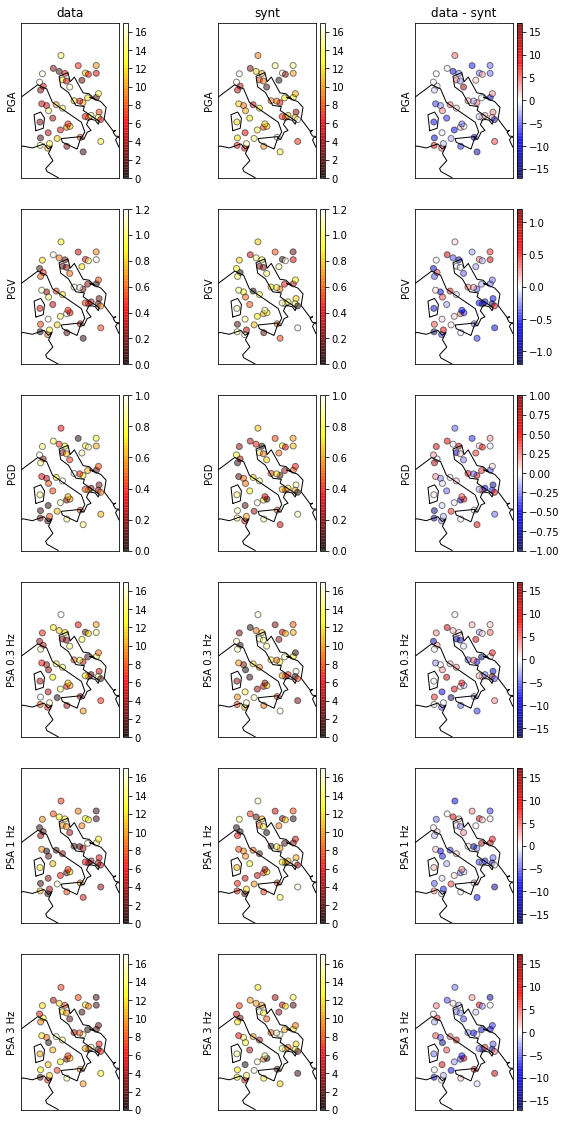

In [14]:
f, axes = plt.subplots(6, 3, sharex='col', sharey='row')
f.set_size_inches([10,20])

k='data'
i=0
ax=axes[:,i]
plot_single(ax[0] ,'PGA',k,source=data,xtitle=k,ytitle='PGA',vmin=0,vmax=17)
plot_single(ax[1] ,'PGV',k,source=data,xtitle=None,  ytitle='PGV',vmin=0,vmax=1.2)
plot_single(ax[2] ,'PGD',k,source=data,xtitle=None,  ytitle='PGD',vmin=0,vmax=1)
plot_single(ax[3] ,'PSA_0.3Hz',k,source=data,xtitle=None,  ytitle='PSA 0.3 Hz',vmin=0,vmax=17)
plot_single(ax[4] ,'PSA_1Hz'  ,k,source=data,xtitle=None,  ytitle='PSA 1 Hz',vmin=0,vmax=17)
plot_single(ax[5] ,'PSA_3Hz'  ,k,source=data,xtitle=None,  ytitle='PSA 3 Hz',vmin=0,vmax=17)

k='synt'
i=1
ax=axes[:,i]
plot_single(ax[0] ,'PGA',k,source=data,xtitle=k,ytitle='PGA',vmin=0,vmax=17)
plot_single(ax[1] ,'PGV',k,source=data,xtitle=None,  ytitle='PGV',vmin=0,vmax=1.2)
plot_single(ax[2] ,'PGD',k,source=data,xtitle=None,  ytitle='PGD',vmin=0,vmax=1)
plot_single(ax[3] ,'PSA_0.3Hz',k,source=data,xtitle=None,  ytitle='PSA 0.3 Hz',vmin=0,vmax=17)
plot_single(ax[4] ,'PSA_1Hz'  ,k,source=data,xtitle=None,  ytitle='PSA 1 Hz',vmin=0,vmax=17)
plot_single(ax[5] ,'PSA_3Hz'  ,k,source=data,xtitle=None,  ytitle='PSA 3 Hz',vmin=0,vmax=17)

k='difference'
i=2
ax=axes[:,i]
plot_single(ax[0] ,'PGA',k,source=data,xtitle='data - synt',ytitle='PGA',vmin=-17,vmax=17)
plot_single(ax[1] ,'PGV',k,source=data,xtitle=None,  ytitle='PGV',vmin=-1.2,vmax=1.2)
plot_single(ax[2] ,'PGD',k,source=data,xtitle=None,  ytitle='PGD',vmin=-1,vmax=1)
plot_single(ax[3] ,'PSA_0.3Hz',k,source=data,xtitle=None,  ytitle='PSA 0.3 Hz',vmin=-17,vmax=17)
plot_single(ax[4] ,'PSA_1Hz'  ,k,source=data,xtitle=None,  ytitle='PSA 1 Hz',vmin=-17,vmax=17)
plot_single(ax[5] ,'PSA_3Hz'  ,k,source=data,xtitle=None,  ytitle='PSA 3 Hz',vmin=-17,vmax=17)

